## KELOMPOK 4 BIDANG PETERNAKAN
## Klasifikasi Telur Unggas Menggunakan Pendekatan GLCM

### Anggota:
### F1D021030	BAIQ ANGGITA ARSYA RAHMATIN
### F1D021115	MUHAMAD SINGGIH
### F1D021108	MAHSA DLIYAUL HAQ
### F1D021046	I MADE DWI JANAKA ARYANA
### F1D021086	ELVITA WILIA KARTIKA

In [117]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import math

In [118]:
def process_dataset(dataset_dir):
    data = [] 
    labels = []
    paths = []
    
    for sub_folder in os.listdir(dataset_dir):
        sub_folder_files = os.listdir(os.path.join(dataset_dir, sub_folder))
        for i, filename in enumerate(sub_folder_files):
            
            img_path = os.path.join(dataset_dir, sub_folder, filename)
            img = cv2.imread(img_path)
            
            #grayscale
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            #rgb
            # gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            data.append(gray_img)
            labels.append(sub_folder)
            paths.append(img_path)
    
    labels = np.array(labels)
    paths = np.array(paths)
    
    return data, labels, paths


Fungsi process_dataset mengambil direktori dataset sebagai input dan mengembalikan tiga output: data, labels, dan paths dengan cara:

Membuat tiga list kosong: data, labels, dan paths. List ini akan digunakan untuk menyimpan data gambar, label, dan path gambar secara berurutan.

Melakukan iterasi pada setiap sub-folder dalam direktori dataset menggunakan os.listdir(dataset_dir). os.listdir() mengembalikan daftar file dan folder dalam suatu direktori.

Untuk setiap sub-folder, mendapatkan daftar file dalam sub-folder tersebut menggunakan os.listdir(os.path.join(dataset_dir, sub_folder)).

Melakukan iterasi pada setiap file dalam sub-folder menggunakan enumerate(sub_folder_files). enumerate() memberikan indeks dan nilai elemen dalam suatu list.

Menggabungkan path file dengan direktori dataset dan sub-folder menggunakan os.path.join(dataset_dir, sub_folder, filename). Ini akan memberikan path lengkap menuju file gambar.

Membaca gambar menggunakan OpenCV dengan cv2.imread(img_path). Gambar akan disimpan dalam variabel img.

Mengubah gambar menjadi grayscale menggunakan cv2.cvtColor(img, cv2.COLOR_BGR2GRAY). Hasilnya akan disimpan dalam variabel gray_img. Jika ingin menggunakan gambar dengan format RGB, dapat menggunakan cv2.cvtColor(img, cv2.COLOR_BGR2RGB).

Menambahkan gambar yang sudah diubah ke dalam list data.

Menambahkan label sub-folder ke dalam list labels.

Menambahkan path lengkap gambar ke dalam list paths.

Mengonversi list labels dan paths menjadi array NumPy menggunakan np.array(labels) dan np.array(paths) kemudian mengembalikan tiga output: data, labels, dan paths.

Fungsi ini digunakan untuk memproses dataset gambar dengan mengambil setiap gambar dalam sub-folder, mengubahnya menjadi grayscale atau RGB, dan mengumpulkan data, label, dan path gambar

In [119]:
def resize_images(images, target_size):
    resized_images = []
    for img in images:
        resized_img = cv2.resize(img, target_size)
        resized_images.append(resized_img)
    return resized_images


Fungsi resize_images mengambil dua input: images dan target_size, dan mengembalikan list resized_images yang berisi gambar-gambar yang telah diubah ukurannya.

Membuat list kosong resized_images yang akan digunakan untuk menyimpan gambar-gambar yang telah diubah ukurannya.

Melakukan iterasi pada setiap gambar dalam list images menggunakan pernyataan for img in images. Untuk setiap gambar, menggunakan fungsi cv2.resize(img, target_size) untuk mengubah ukuran gambar menjadi ukuran target yang telah ditentukan dalam target_size. Gambar yang telah diubah ukurannya disimpan dalam variabel resized_img. Menambahkan gambar yang telah diubah ukurannya ke dalam list resized_images menggunakan resized_images.append(resized_img). Setelah selesai melakukan iterasi pada semua gambar dalam list images, mengembalikan list resized_images yang berisi gambar-gambar yang telah diubah ukurannya.

Fungsi ini digunakan untuk mengubah ukuran gambar-gambar dalam suatu list images menjadi ukuran target yang telah ditentukan. Hal ini berguna saat memproses dataset gambar dengan ukuran yang konsisten sebelum melalui tahap selanjutnya seperti pelatihan model atau analisis lebih lanjut.

In [120]:
def normalize_images(images):
    normalized_images = []
    for img in images:
        normalized_img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
        normalized_images.append(normalized_img)
    return normalized_images

Fungsi normalize_images mengambil satu input yaitu images, yang merupakan list gambar yang ingin dinormalisasi. Fungsi ini akan mengembalikan list normalized_images yang berisi gambar-gambar yang telah dinormalisasi.

Membuat list kosong normalized_images yang akan digunakan untuk menyimpan gambar-gambar yang telah dinormalisasi. Melakukan iterasi pada setiap gambar dalam list images menggunakan pernyataan for img in images. Untuk setiap gambar, menggunakan fungsi cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX) untuk melakukan normalisasi gambar. Normalisasi dilakukan dengan menggunakan rentang nilai minimum dan maksimum yang telah ditentukan yaitu 0 dan 255. Fungsi cv2.NORM_MINMAX digunakan untuk menentukan jenis normalisasi yang ingin digunakan. Gambar yang telah dinormalisasi disimpan dalam variabel normalized_img. Menambahkan gambar yang telah dinormalisasi ke dalam list normalized_images menggunakan normalized_images.append(normalized_img). Setelah selesai melakukan iterasi pada semua gambar dalam list images, mengembalikan list normalized_images yang berisi gambar-gambar yang telah dinormalisasi.

Fungsi ini berguna untuk melakukan normalisasi pada gambar-gambar dalam suatu list images. Normalisasi dapat membantu dalam memperbaiki kontras, kecerahan, atau rentang nilai piksel dalam gambar sehingga memudahkan dalam proses analisis atau pemrosesan lebih lanjut.

In [121]:
kernel = np.ones((5, 5), np.uint8)

def dilation(image, kernel):
    rows, cols = image.shape[:2]
    kernel_rows, kernel_cols = kernel.shape[:2]
    result = np.zeros((rows, cols), dtype=np.uint8)  # Mengubah tipe data menjadi np.uint8
    padded_image = np.pad(image, ((kernel_rows // 2, kernel_rows // 2), (kernel_cols // 2, kernel_cols // 2)), mode='constant')
    for i in range(rows):
        for j in range(cols):
            roi = padded_image[i:i + kernel_rows, j:j + kernel_cols]
            dilated_value = np.max(roi * kernel)
            result[i, j] = dilated_value
    return result

def erosion(image, kernel):
    rows, cols = image.shape
    kernel_rows, kernel_cols = kernel.shape
    result = np.zeros((rows, cols), dtype=np.uint8)  # Mengubah tipe data menjadi np.uint8
    padded_image = np.pad(image, ((kernel_rows // 2, kernel_rows // 2), (kernel_cols // 2, kernel_cols // 2)), mode='constant')
    for i in range(rows):
        for j in range(cols):
            roi = padded_image[i:i + kernel_rows, j:j + kernel_cols]
            eroded_value = np.min(roi * kernel)
            result[i, j] = eroded_value
    return result

def closing(image, kernel):
    return erosion(dilation(image, kernel), kernel)

def closing_image(images):
    closed_images = []
    for image in images:
        clos = closing(image, kernel)
        closed_images.append(clos)
    return closed_images

Terdapat beberapa fungsi yang terkait dengan operasi morfologi, yaitu dilasi, erosi, dan penutupan (closing), serta fungsi closing_image yang digunakan untuk mengaplikasikan operasi penutupan pada setiap gambar dalam suatu list images.

dilation(image, kernel): Fungsi ini melakukan operasi dilasi pada gambar image menggunakan kernel kernel. Dilasi menghasilkan gambar dengan memperbesar atau mempertebal area yang memiliki intensitas piksel yang lebih tinggi. Dalam setiap iterasi, kernel digeser melalui gambar dan nilai piksel terbesar dalam setiap area yang tercakup oleh kernel diambil sebagai nilai piksel dilasi. Hasil dilasi dikembalikan sebagai gambar baru.

erosion(image, kernel): Fungsi ini melakukan operasi erosi pada gambar image menggunakan kernel kernel. Erosi menghasilkan gambar dengan memperkecil atau mempersempit area yang memiliki intensitas piksel yang lebih rendah. Dalam setiap iterasi, kernel digeser melalui gambar dan nilai piksel terkecil dalam setiap area yang tercakup oleh kernel diambil sebagai nilai piksel erosi. Hasil erosi dikembalikan sebagai gambar baru.

closing(image, kernel): Fungsi ini melakukan operasi penutupan (closing) pada gambar image menggunakan kernel kernel. Penutupan adalah operasi morfologi yang menggabungkan operasi dilasi dan erosi secara berurutan. Dalam fungsi ini, dilasi pertama kali diterapkan pada gambar, kemudian diikuti oleh erosi dengan kernel yang sama. Hasil penutupan dikembalikan sebagai gambar baru.

closing_image(images): Fungsi ini menerapkan operasi penutupan pada setiap gambar dalam list images. Setiap gambar dioperasikan menggunakan fungsi closing(image, kernel), dengan kernel yang sama untuk setiap gambar. Hasil gambar yang telah ditutup (closing) ditambahkan ke dalam list closed_images, yang kemudian dikembalikan sebagai output fungsi.

Keseluruhan fungsi-fungsi ini menggunakan operasi dilasi, erosi, dan closing dengan kernel yang telah ditentukan untuk memanipulasi gambar dalam konteks pemrosesan citra.

In [122]:
sx = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])

sy = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])

def konvolusi(image, kernel):
    kernel_row, kernel_col = kernel.shape
    row, col = image.shape
    center_x, center_y = int(kernel_row / 2), int(kernel_col / 2)
    padding = np.pad(array=image, pad_width=((center_x, kernel_row - 1 - center_x), (center_y, kernel_col - 1 - center_y)), mode="constant")
    result = np.zeros((row, col), dtype=np.float64)  # Mengubah tipe data menjadi np.float64
    for i in range(row):
        for j in range(col):
            for k in range(kernel_row):
                for l in range(kernel_col):
                    result[i, j] += padding[i + k, j + l] * kernel[k, l]
    return result

def sobel_detection(images):
    edge_detection = []
    for image in images:
        konvolusisx = konvolusi(image, sx)
        konvolusisy = konvolusi(image, sy)
        hasilsobel = np.sqrt(konvolusisx**2 + konvolusisy**2)
        edge_detection.append(hasilsobel)
    return edge_detection

fungsi konvolusi yang digunakan untuk melakukan operasi konvolusi pada gambar dengan kernel yang telah ditentukan. Selain itu, terdapat fungsi sobel_detection yang menerapkan deteksi tepi menggunakan operator Sobel pada setiap gambar dalam list images.

konvolusi(image, kernel): Fungsi ini melakukan operasi konvolusi pada gambar image menggunakan kernel kernel. Pada setiap iterasi, kernel digeser melalui gambar, dan nilai piksel pada setiap area yang tercakup oleh kernel dikalikan dengan elemen kernel yang sesuai. Hasil perkalian dijumlahkan dan disimpan sebagai nilai piksel dalam gambar hasil. Fungsi ini mengembalikan gambar hasil konvolusi.

sobel_detection(images): Fungsi ini menerapkan deteksi tepi menggunakan operator Sobel pada setiap gambar dalam list images. Pertama, fungsi konvolusi digunakan untuk menerapkan operasi konvolusi menggunakan kernel sx pada gambar, dan hasilnya disimpan dalam variabel konvolusisx. Selanjutnya, fungsi konvolusi digunakan lagi dengan kernel sy pada gambar yang sama, dan hasilnya disimpan dalam variabel konvolusisy. Kemudian, perhitungan akar kuadrat dari kuadrat hasil konvolusi diambil menggunakan np.sqrt(konvolusisx* *2 + konvulsisy * *2), yang menghasilkan gambar hasil deteksi tepi berdasarkan operator Sobel. Gambar hasil deteksi tepi ditambahkan ke dalam list edge_detection, yang kemudian dikembalikan sebagai output fungsi.

Kedua fungsi ini digunakan untuk menerapkan operasi konvolusi pada gambar dan melakukan deteksi tepi menggunakan operator Sobel pada gambar-gambar dalam konteks pemrosesan citra.

In [123]:
def thresholding_image(images, treshval):
    thresholded_images = []
    for image in images:
        rows, cols = image.shape
        thresholded = np.zeros((rows, cols), dtype=np.uint8)  # Mengubah tipe data menjadi np.uint8
        thresholded[image > treshval] = 255
        thresholded_images.append(thresholded)
    return thresholded_images

Fungsi thresholding_image menerima dua input, yaitu images (list gambar) dan treshval (nilai ambang batas). Fungsi ini akan mengembalikan list thresholded_images yang berisi gambar-gambar yang telah di-threshold.

Membuat list kosong thresholded_images yang akan digunakan untuk menyimpan gambar-gambar yang telah di-threshold.

Melakukan iterasi pada setiap gambar dalam list images menggunakan pernyataan for image in images.

Mendapatkan dimensi baris dan kolom gambar menggunakan image.shape. Variabel rows akan menyimpan jumlah baris dan cols akan menyimpan jumlah kolom.

Membuat array kosong thresholded dengan ukuran yang sama dengan gambar menggunakan np.zeros([rows, cols]). Array ini akan digunakan untuk menyimpan gambar yang telah di-threshold.

Menerapkan thresholding pada gambar dengan menggunakan pernyataan thresholded[image > treshval] = 255. Pernyataan ini akan mengatur nilai piksel menjadi 255 (putih) jika nilai piksel dalam gambar melebihi nilai ambang batas treshval, dan nilai piksel tetap 0 (hitam) untuk piksel yang tidak melebihi nilai ambang batas.

Menambahkan gambar yang telah di-threshold ke dalam list thresholded_images menggunakan thresholded_images.append(thresholded).

Setelah selesai melakukan iterasi pada semua gambar dalam list images, mengembalikan list thresholded_images yang berisi gambar-gambar yang telah di-threshold.

Fungsi ini berguna untuk melakukan thresholding pada gambar-gambar dalam suatu list images. Thresholding digunakan untuk mengubah gambar menjadi citra biner dengan membagi piksel menjadi dua kategori berdasarkan ambang batas tertentu. Piksel yang melebihi ambang batas akan diatur menjadi putih (nilai 255), sedangkan piksel di bawah atau sama dengan batas akan diatur menjadi hitam (nilai 0).

In [124]:
dataset_dir = "datasets/"
data, labels, paths= process_dataset(dataset_dir)
resized_data = resize_images(data, (256, 256))
normalized_data = normalize_images(resized_data)
closing_data = closing_image(normalized_data)
edgedetected_data = sobel_detection(closing_data)
treshed_data = thresholding_image(edgedetected_data, 100)

Merupakan langkah-langkah pemrosesan data diterapkan pada dataset gambar.

Memasukkan direktori dataset gambar ke dalam variabel dataset_dir.

Memanggil fungsi process_dataset(dataset_dir) untuk memproses dataset gambar. Hasilnya akan disimpan dalam variabel data (list gambar), labels (array label), dan paths (array path).

Memanggil fungsi resize_images(data, (256, 256)) untuk meresize gambar-gambar dalam data menjadi ukuran (256, 256). Hasilnya akan disimpan dalam variabel resized_data (list gambar yang telah diresize).

Memanggil fungsi normalize_images(resized_data) untuk melakukan normalisasi terhadap gambar-gambar dalam resized_data. Hasilnya akan disimpan dalam variabel normalized_data (list gambar yang telah dinormalisasi).

Memanggil fungsi closing_image(normalized_data) untuk menerapkan operasi penutupan pada gambar-gambar dalam normalized_data. Hasilnya akan disimpan dalam variabel closing_data (list gambar hasil penutupan).

Memanggil fungsi sobel_detection(closing_data) untuk melakukan deteksi tepi menggunakan operator Sobel pada gambar-gambar dalam closing_data. Hasilnya akan disimpan dalam variabel edgedetected_data (list gambar hasil deteksi tepi).

Memanggil fungsi thresholding_image(edgedetected_data, 100) untuk melakukan thresholding pada gambar-gambar dalam edgedetected_data dengan menggunakan nilai ambang batas 100. Hasilnya akan disimpan dalam variabel treshed_data (list gambar hasil thresholding). Setelah langkah-langkah pemrosesan tersebut dieksekusi, hasil akhir akan tersedia dalam variabel treshed_data

In [125]:
save_dir = "preprocessed_images/"
os.makedirs(save_dir, exist_ok=True)

for i, img in enumerate(treshed_data):
    filename = f"image_{i}.jpg"
    save_path = os.path.join(save_dir, filename)
    cv2.imwrite(save_path, img)

print("Images downloaded and saved to:", save_dir)

Images downloaded and saved to: preprocessed_images/


kode di atas merupakan penyimpanan serangkaian gambar hasil preprocessing.
variabel 'save_dir' merupakan tempat menyimpan direktori tujuan dimana gambar hasil preprocessing akan di simpan. direktori disimpan dengan nama preprocessed_images/. 

'os_makedirs' disini merupakan pembuatan direktori direktori jika direktori belum ada dimaan parameter yang diterima yaitu save_dir yang merupakan nama direktori yang akan dibua. dan exist_ok=true merupakan pengecekan apakah direktori sudah ada atau belum

selanjutnya dilakukan iterasi di setiap element treshed_data yang dimanan fungsi enumerate() digunakan untuk mendapatkan indeks (variabel i) dan gambar (variabel img) dari setiap elemen dalam treshed_data.

kdoe 'filename = f"image_{i}.jpg' merupakan pembuatan namafile untuk gambar yang akan disimpan Nama file dibuat menggunakan format string f-string, dengan menambahkan indeks (variabel i) ke dalam nama file untuk membedakan setiap gambar.

kode 'save_path = os.path.join(save_dir, filename)' digunakan untuk Menggabungkan direktori tujuan (save_dir) dengan nama file (filename) menggunakan fungsi os.path.join(). Ini menghasilkan jalur lengkap ke tempat gambar akan disimpan.

'cv2.imwrite(save_path, img)' digunakan untuk Menyimpan gambar ke dalam jalur yang ditentukan menggunakan fungsi imwrite() dari modul cv2 (OpenCV). Gambar (variabel img) akan disimpan dengan nama dan jalur yang telah ditentukan sebelumnya.

'print("Images downloaded and saved to:", save_dir)' digunakan untuk Mencetak pesan yang menunjukkan bahwa gambar-gambar telah berhasil diunduh dan disimpan ke dalam direktori yang ditentukan (save_dir).


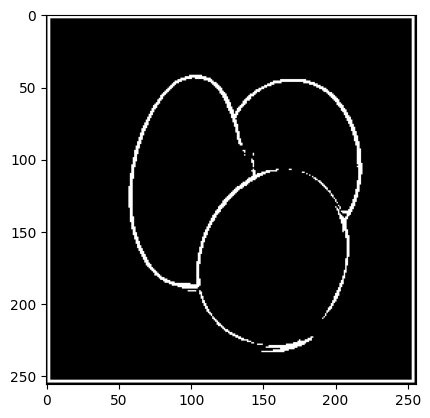

In [126]:
plt.imshow(treshed_data[25], cmap="gray")

In [127]:
def derajat0(data):
    max_val = np.max(data)
    dataTemp = np.zeros([max_val+1, max_val+1], dtype=np.float64)

    for i in range(len(data)):
        for j in range(len(data[i])-1):
            dataTemp[data[i, j], data[i, j+1]] += 1
    
    transpos = np.transpose(dataTemp)
    data = dataTemp + transpos

    temp = np.sum(data)
       
    for i in range(len(data)):
        for j in range(len(data)):
            data[i, j] /= temp
    
    return data

def derajat45(data):
    max_val = np.max(data)
    dataTemp = np.zeros([max_val+1, max_val+1], dtype=np.float64)

    for i in range(len(data)-1):
        for j in range(len(data[i])-1):
            dataTemp[data[i+1, j], data[i, j+1]] += 1
    
    transpos = np.transpose(dataTemp)
    data = dataTemp + transpos
    
    temp = np.sum(data)
    
    for i in range(len(data)):
        for j in range(len(data)):
            data[i, j] /= temp
    return data

def derajat90(data):
    max_val = np.max(data)
    dataTemp = np.zeros([max_val+1, max_val+1], dtype=np.float64)

    for i in range(len(data)-1):
        for j in range(len(data[i])):
            dataTemp[data[i+1, j], data[i, j]] += 1
    
    transpos = np.transpose(dataTemp)
    data = dataTemp + transpos
    
    temp = np.sum(data)
    
    for i in range(len(data)):
        for j in range(len(data)):
            data[i, j] /= temp
    return data

def derajat135(data):
    max_val = np.max(data)
    dataTemp = np.zeros([max_val+1, max_val+1], dtype=np.float64)

    for i in range(len(data)-1):
        for j in range(len(data[i])-1):
            dataTemp[data[i, j], data[i+1, j+1]] += 1
    
    transpos = np.transpose(dataTemp)
    data = dataTemp + transpos
    
    temp = np.sum(data)
    
    for i in range(len(data)):
        for j in range(len(data)):
            data[i, j] /= temp
    return data

derajat0(data): Fungsi ini menghitung matriks kemunculan pasangan nilai piksel yang memiliki arah sudut 0 derajat dalam suatu gambar. Pada setiap iterasi, fungsi mengambil pasangan piksel yang berurutan secara horizontal pada setiap baris gambar dan meningkatkan frekuensi kemunculan pasangan tersebut dalam matriks dataTemp. Kemudian, matriks dataTemp ditranspos dan dijumlahkan dengan dirinya sendiri untuk memperoleh matriks simetris. Setelah itu, matriks data dinormalisasi dengan membagi setiap elemennya dengan total jumlah elemen dalam matriks.

derajat45(data): Fungsi ini menghitung matriks kemunculan pasangan nilai piksel yang memiliki arah sudut 45 derajat dalam suatu gambar. Pada setiap iterasi, fungsi mengambil pasangan piksel yang berurutan secara diagonal ke kanan atas pada gambar dan meningkatkan frekuensi kemunculan pasangan tersebut dalam matriks dataTemp. Kemudian, matriks dataTemp ditranspos dan dijumlahkan dengan dirinya sendiri untuk memperoleh matriks simetris. Setelah itu, matriks data dinormalisasi dengan membagi setiap elemennya dengan total jumlah elemen dalam matriks.

derajat90(data): Fungsi ini menghitung matriks kemunculan pasangan nilai piksel yang memiliki arah sudut 90 derajat dalam suatu gambar. Pada setiap iterasi, fungsi mengambil pasangan piksel yang berurutan secara vertikal pada gambar dan meningkatkan frekuensi kemunculan pasangan tersebut dalam matriks dataTemp. Kemudian, matriks dataTemp ditranspos dan dijumlahkan dengan dirinya sendiri untuk memperoleh matriks simetris. Setelah itu, matriks data dinormalisasi dengan membagi setiap elemennya dengan total jumlah elemen dalam matriks.

derajat135(data): Fungsi ini menghitung matriks kemunculan pasangan nilai piksel yang memiliki arah sudut 135 derajat dalam suatu gambar. Pada setiap iterasi, fungsi mengambil pasangan piksel yang berurutan secara diagonal ke kanan bawah pada gambar dan meningkatkan frekuensi kemunculan pasangan tersebut dalam matriks dataTemp. Kemudian, matriks dataTemp ditranspos dan dijumlahkan dengan dirinya sendiri untuk memperoleh matriks simetris. Setelah itu, matriks data dinormalisasi dengan membagi setiap elemennya dengan total jumlah elemen dalam matriks.

In [128]:
def calculate_contrast(glcm):
    contrast = 0
    rows, cols = glcm.shape
    for i in range(rows):
        for j in range(cols):
            contrast += ((i - j) ** 2) * glcm[i, j]
    return contrast

def calculate_dissimilarity(glcm):
    dissimilarity = 0
    rows, cols = glcm.shape
    for i in range(rows):
        for j in range(cols):
            dissimilarity += np.abs(i - j) * glcm[i, j]
    return dissimilarity

def calculate_homogeneity(glcm):
    homogeneity = 0
    rows, cols = glcm.shape
    for i in range(rows):
        for j in range(cols):
            homogeneity += glcm[i, j] / (1 + np.abs(i - j))
    return homogeneity

def calculate_energy(glcm):
    energy = np.sum(glcm ** 2)
    return energy

def calculate_correlation(glcm):
    rows, cols = glcm.shape
    i_vals, j_vals = np.mgrid[:rows, :cols]
    mean_i = np.sum(i_vals * glcm)
    mean_j = np.sum(j_vals * glcm)
    std_i = np.sqrt(np.sum((i_vals - mean_i) ** 2 * glcm))
    std_j = np.sqrt(np.sum((j_vals - mean_j) ** 2 * glcm))
    correlation = np.sum(((i_vals - mean_i) * (j_vals - mean_j) * glcm) / (std_i * std_j))
    return correlation

def calculated_entrophy(glcm):
    simpan = 0
    for i in range(len(data)):
        for j in range(len(data)):
            if data[i,j] > 0:
                simpan+= -(data[i,j] * math.log(data[i,j]))
    return simpan

def calculated_asm(glcm):
    asm = np.sum(glcm ** 2)
    asm /= np.prod(glcm.shape)  # Normalisasi dengan ukuran matriks
    return asm

calculate_contrast(glcm): Fungsi ini menghitung kontras dari matriks GLCM. Kontras dihitung sebagai jumlah kuadrat perbedaan intensitas antara pasangan piksel yang muncul dalam GLCM.

calculate_dissimilarity(glcm): Fungsi ini menghitung dissimilarity dari matriks GLCM. Dissimilarity dihitung sebagai jumlah absolut perbedaan intensitas antara pasangan piksel yang muncul dalam GLCM.

calculate_homogeneity(glcm): Fungsi ini menghitung homogeneity dari matriks GLCM. Homogeneity dihitung sebagai jumlah intensitas kemunculan pasangan piksel dalam GLCM, yang dibagi dengan jarak absolut antara pasangan piksel tersebut.

calculate_energy(glcm): Fungsi ini menghitung energy dari matriks GLCM. Energy dihitung sebagai jumlah kuadrat dari setiap elemen dalam GLCM.

calculate_correlation(glcm): Fungsi ini menghitung korelasi dari matriks GLCM. Korelasi dihitung dengan menggunakan rumus statistik yang melibatkan rata-rata, standar deviasi, dan kovarians antara intensitas kemunculan pasangan piksel dalam GLCM.

calculated_entrophy(glcm): Fungsi ini menghitung entropi dari matriks GLCM. Entropi dihitung sebagai jumlah nilai negatif dari setiap elemen non-nol dalam GLCM dikalikan dengan logaritma natural elemen tersebut.

calculated_asm(glcm): Fungsi ini menghitung angular second moment (ASM) dari matriks GLCM. ASM dihitung sebagai jumlah kuadrat dari setiap elemen dalam GLCM yang dinormalisasi dengan ukuran matriks.

Fungsi-fungsi ini dapat digunakan untuk mengukur berbagai fitur tekstur atau karakteristik dari gambar berdasarkan matriks GLCM yang dihasilkan.

In [129]:
def calculate_glcm_features(data, path, count):
    glcm_0 = derajat0(data)
    glcm_45 = derajat45(data)
    glcm_90 = derajat90(data)
    glcm_135 = derajat135(data)

    contrast_0 = calculate_contrast(glcm_0)
    dissimilarity_0 = calculate_dissimilarity(glcm_0)
    homogeneity_0 = calculate_homogeneity(glcm_0)
    energy_0 = calculate_energy(glcm_0)
    correlation_0 = calculate_correlation(glcm_0)
    entrophy_0 = calculated_entrophy(glcm_0)
    asm_0 = calculated_asm(glcm_0)

    contrast_45 = calculate_contrast(glcm_45)
    dissimilarity_45 = calculate_dissimilarity(glcm_45)
    homogeneity_45 = calculate_homogeneity(glcm_45)
    energy_45 = calculate_energy(glcm_45)
    correlation_45 = calculate_correlation(glcm_45)
    entrophy_45 = calculated_entrophy(glcm_45)
    asm_45 = calculated_asm(glcm_45)

    contrast_90 = calculate_contrast(glcm_90)
    dissimilarity_90 = calculate_dissimilarity(glcm_90)
    homogeneity_90 = calculate_homogeneity(glcm_90)
    energy_90 = calculate_energy(glcm_90)
    correlation_90 = calculate_correlation(glcm_90)
    entrophy_90 = calculated_entrophy(glcm_90)
    asm_90 = calculated_asm(glcm_90)

    contrast_135 = calculate_contrast(glcm_135)
    dissimilarity_135 = calculate_dissimilarity(glcm_135)
    homogeneity_135 = calculate_homogeneity(glcm_135)
    energy_135 = calculate_energy(glcm_135)
    correlation_135 = calculate_correlation(glcm_135)
    entrophy_135 = calculated_entrophy(glcm_135)
    asm_135 = calculated_asm(glcm_135)
    
    
    features = [
        count, path, contrast_0, dissimilarity_0, homogeneity_0, energy_0, correlation_0, entrophy_0,asm_0,
        contrast_45, dissimilarity_45, homogeneity_45, energy_45, correlation_45, entrophy_45,asm_45,
        contrast_90, dissimilarity_90, homogeneity_90, energy_90, correlation_90, entrophy_90,asm_90,
        contrast_135, dissimilarity_135, homogeneity_135, energy_135, correlation_135, entrophy_135, asm_135
    ]
    
    return features

Fungsi calculate_glcm_features digunakan untuk menghitung fitur-fitur GLCM dari data gambar yang telah melalui proses pra-pemrosesan sebelumnya. Fungsi ini menghasilkan fitur-fitur GLCM untuk empat arah (0 derajat, 45 derajat, 90 derajat, dan 135 derajat).

glcm_0, glcm_45, glcm_90, glcm_135: Matriks GLCM untuk masing-masing arah (0 derajat, 45 derajat, 90 derajat, 135 derajat) yang dihitung menggunakan fungsi derajat0, derajat45, derajat90, dan derajat135.

contrast_0, dissimilarity_0, homogeneity_0, energy_0, correlation_0, entrophy_0, asm_0: Fitur-fitur GLCM yang dihitung dari matriks GLCM pada arah 0 derajat.

contrast_45, dissimilarity_45, homogeneity_45, energy_45, correlation_45, entrophy_45, asm_45: Fitur-fitur GLCM yang dihitung dari matriks GLCM pada arah 45 derajat.

contrast_90, dissimilarity_90, homogeneity_90, energy_90, correlation_90, entrophy_90, asm_90: Fitur-fitur GLCM yang dihitung dari matriks GLCM pada arah 90 derajat.

contrast_135, dissimilarity_135, homogeneity_135, energy_135, correlation_135, entrophy_135, asm_135: Fitur-fitur GLCM yang dihitung dari matriks GLCM pada arah 135 derajat.

features: Array yang berisi semua fitur-fitur yang dihasilkan. Fitur-fitur ini termasuk nilai-nilai fitur GLCM untuk setiap arah.

Fungsi ini mengembalikan features, yang berisi jalur gambar (path) dan semua fitur GLCM yang dihitung. Fitur-fitur ini dapat digunakan untuk analisis dan pemrosesan lebih lanjut.

In [130]:
features = []
for i, data in enumerate(treshed_data):
    img_features = calculate_glcm_features(data, paths[i], i)
    features.append(img_features)

df = pd.DataFrame(features, columns=['Unnamed: 0','path', 'contrast_0', 'dissimilarity_0', 'homogeneity_0', 'energy_0', 'correlation_0', 'entropy_0','asm_0',
    'contrast_45', 'dissimilarity_45', 'homogeneity_45', 'energy_45', 'correlation_45','entropy_45','asm_45',
    'contrast_90', 'dissimilarity_90', 'homogeneity_90', 'energy_90', 'correlation_90','entropy_95','asm_90',
    'contrast_135', 'dissimilarity_135', 'homogeneity_135', 'energy_135', 'correlation_135', 'entropy_135', 'asm_135'
])

fitur-fitur GLCM dihitung untuk setiap data gambar dalam normalized_data. Kemudian, fitur-fitur tersebut disimpan dalam sebuah DataFrame menggunakan library Pandas.

features: Awalnya merupakan sebuah list kosong. Setiap kali fitur-fitur GLCM dihitung untuk sebuah gambar, fitur-fitur tersebut ditambahkan ke dalam features sebagai elemen list.

img_features: Merupakan hasil dari pemanggilan fungsi calculate_glcm_features(data, paths[i]). Ini adalah fitur-fitur GLCM untuk sebuah gambar.

df: DataFrame yang dibentuk dari features. DataFrame ini memiliki kolom-kolom yang sesuai dengan fitur-fitur GLCM yang dihitung, yaitu 'path', 'contrast_0', 'dissimilarity_0', 'homogeneity_0', 'energy_0', 'correlation_0', 'entropy_0', 'asm_0', 'contrast_45', 'dissimilarity_45', 'homogeneity_45', 'energy_45', 'correlation_45', 'entropy_45', 'asm_45', 'contrast_90', 'dissimilarity_90', 'homogeneity_90', 'energy_90', 'correlation_90', 'entropy_95', 'asm_90', 'contrast_135', 'dissimilarity_135', 'homogeneity_135', 'energy_135', 'correlation_135', 'entropy_135', 'asm_135'.

DataFrame df dapat digunakan untuk analisis lebih lanjut atau sebagai input untuk pemodelan dan pembelajaran mesin. Anda dapat melakukan manipulasi data, pemfilteran, visualisasi, atau melatih model pada DataFrame.

In [131]:
df['labels'] = labels
df.to_csv(r'glcm_result.csv', index=False)
print(df)

     Unnamed: 0                                               path  \
0             0                         datasets/ayam\download.jpg   
1             1   datasets/ayam\egg-white-food-protein-162712.jpeg   
2             2                       datasets/ayam\images (1).jpg   
3             3                           datasets/ayam\images.jpg   
4             4              datasets/ayam\IMG_20220818_154051.jpg   
..          ...                                                ...   
295         295  datasets/puyuh\karyna-panchenko-vlxj7z9nhke-un...   
296         296  datasets/puyuh\Kenali-Manfaat-Telur-Puyuh-Untu...   
297         297  datasets/puyuh\manfaat-telur-puyuh-doktersehat...   
298         298         datasets/puyuh\telur_puyuh_doktersehat.jpg   
299         299  datasets/puyuh\Trubus-Edisi-Februari-2019-High...   

       contrast_0  dissimilarity_0  homogeneity_0  energy_0  correlation_0  \
0     1952.343750         7.656250       0.970093  0.866311       0.712865   
1  

setelah DataFrame df dibentuk, kolom 'labels' ditambahkan ke dalam DataFrame tersebut dengan menggunakan data dari variabel labels. Kemudian, DataFrame df disimpan dalam format CSV dengan nama file "glcm_result.csv" menggunakan fungsi to_csv(). Parameter index=False digunakan untuk menghilangkan indeks saat menyimpan data ke dalam file CSV. DataFrame df dicetak menggunakan fungsi print() untuk melihat tampilan DataFrame tersebut di konsol.

In [133]:
features = []
for i, data in enumerate(resized_data):
    img_features = calculate_glcm_features(data, paths[i], i)
    features.append(img_features)

df_bef_preprocessing = pd.DataFrame(features, columns=['Unnamed: 0', 'path', 'contrast_0', 'dissimilarity_0', 'homogeneity_0', 'energy_0', 'correlation_0', 'entropy_0', 'asm_0',
                                     'contrast_45', 'dissimilarity_45', 'homogeneity_45', 'energy_45', 'correlation_45', 'entropy_45', 'asm_45',
                                     'contrast_90', 'dissimilarity_90', 'homogeneity_90', 'energy_90', 'correlation_90', 'entropy_95', 'asm_90',
                                     'contrast_135', 'dissimilarity_135', 'homogeneity_135', 'energy_135', 'correlation_135', 'entropy_135', 'asm_135'])


fitur-fitur GLCM dihitung untuk setiap data gambar dalam normalized_data. Kemudian, fitur-fitur tersebut disimpan dalam sebuah DataFrame menggunakan library Pandas.

features: Awalnya merupakan sebuah list kosong. Setiap kali fitur-fitur GLCM dihitung untuk sebuah gambar, fitur-fitur tersebut ditambahkan ke dalam features sebagai elemen list.

img_features: Merupakan hasil dari pemanggilan fungsi calculate_glcm_features(data, paths[i]). Ini adalah fitur-fitur GLCM untuk sebuah gambar.

df: DataFrame yang dibentuk dari features. DataFrame ini memiliki kolom-kolom yang sesuai dengan fitur-fitur GLCM yang dihitung, yaitu 'path', 'contrast_0', 'dissimilarity_0', 'homogeneity_0', 'energy_0', 'correlation_0', 'entropy_0', 'asm_0', 'contrast_45', 'dissimilarity_45', 'homogeneity_45', 'energy_45', 'correlation_45', 'entropy_45', 'asm_45', 'contrast_90', 'dissimilarity_90', 'homogeneity_90', 'energy_90', 'correlation_90', 'entropy_95', 'asm_90', 'contrast_135', 'dissimilarity_135', 'homogeneity_135', 'energy_135', 'correlation_135', 'entropy_135', 'asm_135'.

DataFrame df dapat digunakan untuk analisis lebih lanjut atau sebagai input untuk pemodelan dan pembelajaran mesin. Anda dapat melakukan manipulasi data, pemfilteran, visualisasi, atau melatih model pada DataFrame.

In [134]:
df_bef_preprocessing['labels'] = labels
df_bef_preprocessing.to_csv(r'before_glcm_result.csv', index=False)
print(df_bef_preprocessing)

     Unnamed: 0                                               path  \
0             0                         datasets/ayam\download.jpg   
1             1   datasets/ayam\egg-white-food-protein-162712.jpeg   
2             2                       datasets/ayam\images (1).jpg   
3             3                           datasets/ayam\images.jpg   
4             4              datasets/ayam\IMG_20220818_154051.jpg   
..          ...                                                ...   
295         295  datasets/puyuh\karyna-panchenko-vlxj7z9nhke-un...   
296         296  datasets/puyuh\Kenali-Manfaat-Telur-Puyuh-Untu...   
297         297  datasets/puyuh\manfaat-telur-puyuh-doktersehat...   
298         298         datasets/puyuh\telur_puyuh_doktersehat.jpg   
299         299  datasets/puyuh\Trubus-Edisi-Februari-2019-High...   

      contrast_0  dissimilarity_0  homogeneity_0  energy_0  correlation_0  \
0      20.880116         1.447426       0.782898  0.373523       0.992074   
1    

setelah DataFrame df dibentuk, kolom 'labels' ditambahkan ke dalam DataFrame tersebut dengan menggunakan data dari variabel labels. Kemudian, DataFrame df disimpan dalam format CSV dengan nama file "glcm_result.csv" menggunakan fungsi to_csv(). Parameter index=False digunakan untuk menghilangkan indeks saat menyimpan data ke dalam file CSV. DataFrame df dicetak menggunakan fungsi print() untuk melihat tampilan DataFrame tersebut di konsol.